In [25]:
import numpy as np

In [26]:
class Logistic_Regression:
    def __init__(self,learning_rate=0.01,n_iter=1000):
        #reference to the current instance of the class 
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        
        #we will declare this value during fit
        self.weight = None
        self.bias = None
        
        #creating history variable to store accuracy
        self.history = []
        
    def fit(self,X,y):
        #Fetching number of samples and features from the data
        n_samples, n_features = X.shape
        
        #Initiation weight and bias with zero
        self.weight = np.zeros(shape=(n_features))
        self.bias = 0
        
        
        
        #Fitting the data 
        for _ in range(self.n_iter):
            #First predict the y using initial weight and bias
            linear = np.dot(X,self.weight) + self.bias
            y_predicted = self.sigmoid(linear)
            
            ##Adding error in history
            self.history.append(self.accuracy(y_predicted,y))
            
            #getting gradient             
            dw = (1/n_samples) * np.dot(X.T,(y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            #updating values using gradient 
            self.weight = self.weight - (self.learning_rate)*dw
            self.bias = self.bias - (self.learning_rate)*db
            
        return self.history
            
    def predict(self,X):
        linear = np.dot(X,self.weight) + self.bias
        y_predicted = self.sigmoid(linear)
        return y_predicted > 0.5

    def sigmoid(self,linear):
        return 1/(1+np.exp(-linear))
    
    def accuracy(self,predictions,targets):
         return (np.sum(np.equal(predictions>0.5,targets)) / len(targets))
        
    def _intercept(self):
        return self.bias
    
    def _coef(self):
        return self.weight

In [27]:
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split

In [118]:
X, y = make_classification(n_samples=150,n_features=2,n_redundant=0,random_state=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [120]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

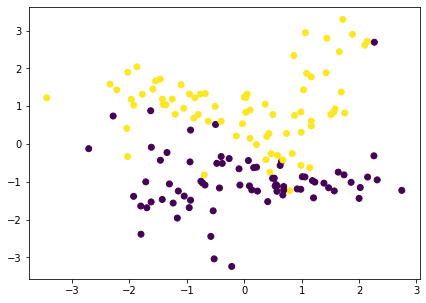

In [121]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:,0],X[:,1],c=y)

In [122]:
model = Logistic_Regression(learning_rate=0.01)
hist= model.fit(X_train, y_train)
y_predict = model.predict(X_test)
w,b = model._coef(),model._intercept()
print("Weight: {}\nBias: {:.2f}".format(w,b))

Weight: [0.12571291 1.73712511]
Bias: 0.13


In [123]:
model.accuracy(y_test,y_predict)

0.86

In [124]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

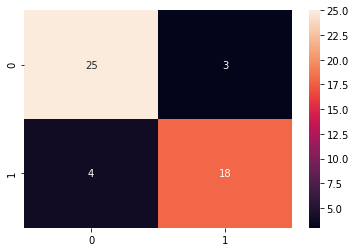

In [125]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

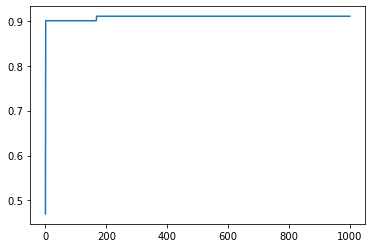

In [126]:
plt.plot(hist)